###    This code is implementation of Markov chain Monte Carlo method for converging to a low energy state of Methane molecule.The initial geometry of methane(CH4) is read from a file(can be assigned randomly with appropriate constraints). Convergence is achieved with different rate depending upon a "kt" parameter used to calculate acceptance probability.The Final geometry,bond angle and bond length are printed to std OUT.\Graph of energy at every 1000 iterations is plotted.


In [1]:
import math
import matplotlib.pyplot as plot
import random
from itertools import combinations

In [2]:
def dot(x,y):
    #dot product of two vectors
    z=(x[0]*y[0]+x[1]*y[1]+x[2]*y[2])
    return(z)
def mod(x):
    #modulus
    z=(x[0]**2+x[1]**2+x[2]**2)**0.5
    return(z)
def ang(x,y):
    #angle between vectors
    ba=math.degrees(math.acos(dot(x,y)/(mod(x)*mod(y))))
    return(ba)    
def dis(x,y):
    #distance between two points
    d=((x[0]-y[0])**2+(x[1]-y[1])**2+(x[2]-y[2])**2)**0.5
    return(d)

def energy(c,h1,h2,h3,h4):
    #energy at a particular state of methane molecule
    d1=dis(c,h1)
    d2=dis(c,h2)
    d3=dis(c,h3)
    d4=dis(c,h4)
    r=float(1.08)
    t=float(109.5)
    e=367.0/2*((d1-r)**2+(d2-r)**2+(d3-r)**2+(d4-r)**2)
    for i,j in combinations([h1,h2,h3,h4],2):
        e+=35.0/2*((ang(i,j)-t)**2)
    return(e)
def probabilityOfAccept(e1,e2,kt):
    p=math.exp((e1-e2)/kt)
    return(min(1,p))


In [3]:
#Read file from directory
pdb =open('C:/course work/689/A2/methane_start.pdb')

#Read from file 
coordinate={}
for line in pdb:
    lst=line.split()
    coordinate[lst[2]]=list(map(float,lst[5:8]))

In [4]:

kt=[0.4,0.6,0.8]         #parameter in calculation of acceptance probability
maxloop=100000
stepsize=0.003
energystate=[[] for _ in range(len(kt))]
initialEnergy=energy(coordinate["C"],coordinate["H1"],coordinate["H2"],coordinate["H3"],coordinate["H4"])

In [5]:
for par in range(len(kt)):

    #parameter loop variables
    energylist=[]
    energylist.append(initialEnergy)
    finalEnergy=initialEnergy
    temp=coordinate.copy()
    final=temp.copy()

    #convergence loop to confirmation geometry
    for i in range(1,maxloop):
        select=random.choice(["H1","H2","H3","H4"])
        for j in range(3):
            temp[select][j]=final[select][j]+random.uniform(-stepsize,stepsize)
        energylist.append(energy(temp["C"],temp["H1"],temp["H2"],temp["H3"],temp["H4"]))
        if energylist[i]<finalEnergy:
            finalEnergy=energylist[i]
            final[select]=temp[select][:]                 
        elif random.uniform(0,1)<probabilityOfAccept(finalEnergy,energylist[i],kt[par]):
            finalEnergy=energylist[i]
            final[select]=temp[select][:]
        if i%1000==0:
            energystate[par].append(energylist[i])

    #Outputvariable
    print("For parameter kt=",kt[par])
    print("Confrmation Geometry of Methane:",final)
    print("Bond Angle:",ang(final["H1"],final["H2"]),"   ","Bond Length:",mod(final["H2"]))
    plot.plot(energystate[par],label=kt[par])


For parameter kt= 0.4
Confrmation Geometry of Methane: {'C': [0.0, 0.0, 0.0], 'H1': [0.20478330281174592, 0.16204787983442143, 0.9869264580296752], 'H2': [0.4641470831144192, 0.7734227029456792, -0.5980211817877846], 'H3': [0.39120464619727, -0.9683378916662899, -0.2967825802449074], 'H4': [-1.0819628479333994, 0.021484526503064285, -0.15573048926813546]}
Bond Angle: 109.55586380895738     Bond Length: 1.0822405121146974
For parameter kt= 0.6
Confrmation Geometry of Methane: {'C': [0.0, 0.0, 0.0], 'H1': [0.03238173948461285, 0.5955442958711544, 1.0028522039624128], 'H2': [0.1791813521441124, 0.6701786103371119, -0.6729025390757623], 'H3': [0.38758016619046676, -0.9660583979617611, -0.29506317794637166], 'H4': [-0.7953729945011854, 0.25843896267819605, -0.5310429081175906]}
Bond Angle: 103.84770257326755     Bond Length: 0.9664590802533662
For parameter kt= 0.8
Confrmation Geometry of Methane: {'C': [0.0, 0.0, 0.0], 'H1': [0.07134296681841298, 0.2557457511094915, 1.0234421934032423], 'H

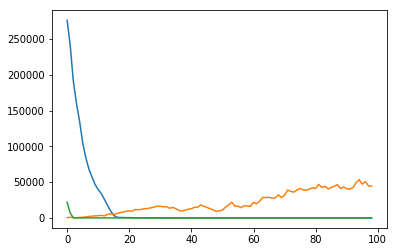

In [6]:
plot.show()